In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import json

In [8]:
# raw_data = pd.read_csv("./Aktify/home_security_multi_intent.csv")[["phrase", "intents"]]
raw_data = pd.read_csv("./Aktify/credit_repair_multi_intent.csv")[["phrase", "intents"]]

In [9]:
raw_data["phrase"]

0       Can you call me on Monday right now I'm babysi...
1       I want your help,  but when I'M ready!.....I g...
2       Sorry I'm dealing with a family situation righ...
3       Last time I used you guys you charged me for a...
4       Will not using ur services I was told before s...
                              ...                        
4607    $[MONEY_1] a month only for the first month or...
4608    I have some insurance with [ORGANIZATION_1]. T...
4609    Hey sorry i keep missing your calls im still u...
4610    Uhm, no I don't think I'm interested at all. Y...
4611    Hello would you please stop texting me you've ...
Name: phrase, Length: 4612, dtype: object

In [10]:
def processing_data(raw_data):
    special_char = '\@_!-#$%^&*()<>?/.\|}{~:;[],"\"'
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    raw_utterance = [i.lower() for i in raw_data["phrase"]]
    raw_utterance1 = []

    for utt in raw_utterance:
        new_utt = ''.join((filter(lambda i: i not in special_char, utt)))
        new_utt = re.sub("[\n]"," ", new_utt)
        new_utt = re.sub(emoji_pattern, "", new_utt)
        new_utt = re.sub("[ ]+", " " , new_utt)
        raw_utterance1.append(new_utt)
    return raw_utterance1

In [11]:
raw_data["phrase"] = processing_data(raw_data)

In [12]:
def processing_label(raw_data):
    raw_intent = [i for i in raw_data["intents"]]
    intent_list = []
    chars = re.escape(string.punctuation)
    for sample_intent in raw_intent:
        sample_intent1 = ["_".join(re.sub(r'['+chars+']', " ", i).strip().split(" ")[1:]) 
                          for i in sample_intent.split(",")]
        intent_list.append(sample_intent1)

    return intent_list

In [13]:

with open('processed_utterance.json', 'w') as f:
    json.dump(raw_utterance1, f)

with open('processed_intents.json', 'w') as f:
    json.dump(intent_list, f)

NameError: name 'raw_utterance1' is not defined

In [15]:
unique = [x for x in set([j for i in intent_list for j in i])]

NameError: name 'intent_list' is not defined

In [ ]:
len(unique)

In [11]:
intent_count = {}
all_intents = [j for i in intent_list for j in i]
for i in all_intents:
    if i not in intent_count:
        intent_count[i] = 1
    else:
        intent_count[i] += 1
intent_name = []
intent_count_val = []
for i in intent_count:
    intent_name.append(i)
    intent_count_val.append(intent_count[i])
    

name_dict = {}
for i in range(len(intent_name)):
    name_dict[i] = intent_name[i]

<BarContainer object of 52 artists>

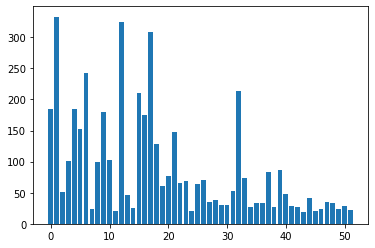

In [12]:
plt.bar(name_dict.keys(), intent_count_val)

In [16]:
from transformers import BertTokenizer

In [17]:
obj = BertTokenizer.from_pretrained("bert-base-uncased").batch_encode_plus(raw_utterance1)

NameError: name 'raw_utterance1' is not defined

In [ ]:
length = []
for i in obj.input_ids:
    length.append(len(i))


In [18]:
length.sort()

NameError: name 'length' is not defined

In [19]:
path = "./Aktify/credit_repair_multi_intent.csv"

In [20]:
raw_data = pd.read_csv(path)[["phrase", "intents"]]

In [21]:
def processing_data(raw_data):
    
    special_char = '\@_!-#$%^&*()<>?/.\|}{~:;[],"\"'
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    raw_utterance = [i.lower() for i in raw_data["phrase"]]
    raw_utterance1 = []

    for utt in raw_utterance:
        new_utt = ''.join((filter(lambda i: i not in special_char, utt)))
        new_utt = re.sub("[\n]"," ", new_utt)
        new_utt = re.sub(emoji_pattern, "", new_utt)
        new_utt = re.sub("[ ]+", " " , new_utt)
        raw_utterance1.append(new_utt)

    raw_intent = [i for i in raw_data["intents"]]
    intent_list = []
    chars = re.escape(string.punctuation)
    for sample_intent in raw_intent:
        sample_intent1 = ["_".join(re.sub(r'['+chars+']', " ", i).strip().split(" ")[1:]) 
                          for i in sample_intent.split(",")]
        intent_list.append(sample_intent1)

    raw_data["intents"] = intent_list
    raw_data["phrase"] = raw_utterance1
    
    return raw_data

In [22]:
raw_data = processing_data(raw_data)

In [23]:
raw_data

,phrase,intents
0,can you call me on monday right now i'm babysi...,"[call_now, delay_hours, confirmation, schedule..."
1,i want your help but when i'm readyi gotta get...,"[delay_finances, excessive_contact, delay_eval..."
2,sorry i'm dealing with a family situation righ...,"[delay_family_sick, confirmation, schedule_cal..."
3,last time i used you guys you charged me for a...,"[credit_history, existing_customer_issue, not_..."
4,will not using ur services i was told before s...,"[not_interested, dissatisfied_customer]"
...,...,...
4607,money1 a month only for the first month or for...,"[how_does_it_work, cost_demand]"
4608,i have some insurance with organization1 thank...,"[dnc, courtesy_or_statement, chose_competitor,..."
4609,hey sorry i keep missing your calls im still u...,"[greeting, delay_sleeping, delay_work, apology]"
4610,uhm no i don't think i'm interested at all you...,"[not_interested, negation, dissatisfied_customer]"


In [24]:
raw_data = raw_data.sample(frac=1).reset_index(drop=True)

In [25]:
test = raw_data.iloc[:200]

In [26]:
test.to_csv("test.csv")

In [27]:
train = raw_data.iloc[200:]

In [28]:
train.to_csv('train.csv')

In [29]:
unique = [x for x in set([j for i in raw_data["intents"] for j in i])]

In [30]:
len(sorted(unique))

67

In [31]:
train_unique = [x for x in set([j for i in train["intents"] for j in i])]

In [32]:
len(train_unique)

67

In [33]:
test_unique = [x for x in set([j for i in test["intents"] for j in i])]

In [34]:
len(test_unique)

61

In [35]:
print(len(train))

4412


In [36]:
print(len(test))

200


In [41]:
pd.read_csv("/home/song/Desktop/Multi-Intents-Detection/data/Aktify/test_credit.csv",lineterminator="\n" )

,Unnamed: 0,phrase,intents
0,0,i heard you guys were the best out there right...,"['is_interested', 'schedule_call_day_n_time']"
1,1,i didn't schedule a phone call for todayi said...,"['delay_will_reply', 'dnc', 'scheduling_mistak..."
2,2,no stop bothering me i don't have credit probl...,"['dnc', 'not_interested']"
3,3,that is generous of you but 50 per month is no...,"['cost_too_high', 'is_interested', 'how_does_i..."
4,4,i hope you guys aren't taking my money again i...,"['existing_customer_issue', 'needs_income']"
...,...,...,...
195,195,i was interested in you credit assistance but ...,"['cost_too_high', 'is_interested', 'needs_inco..."
196,196,thank you i am interested in fixing my credit ...,"['courtesy_or_statement', 'is_interested', 'cr..."
197,197,my mother is in the hospital at this time she ...,"['delay_sick', 'delay_conditional']"
198,198,i wasn't overly happy with your service no pro...,"['dissatisfied_customer', 'negative_call_cente..."
